In [1]:
%load_ext autoreload
%autoreload 2

In [60]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import ot
import torch

from src.methods.mirror_prox import MirrorProx
from src.methods.paus import PAUS
from src.oracles.oracle import OperatorOracle
from src.utils.dataset import get_gaussian, load_mnist784, load_notMNIST_small
from src.utils.tm import get_1d_tm, get_2d_tm

In [3]:
torch.manual_seed(30)

In [4]:
DEVICE = 1

# MNIST 784

In [5]:
d = 28
T = 100
n = T // 2
L = 2
max_iter = 1000
step_scale = 1.0
target_letter = "B"
target_digit = 4

In [6]:
letters = load_notMNIST_small(target_letter, T, device=DEVICE)

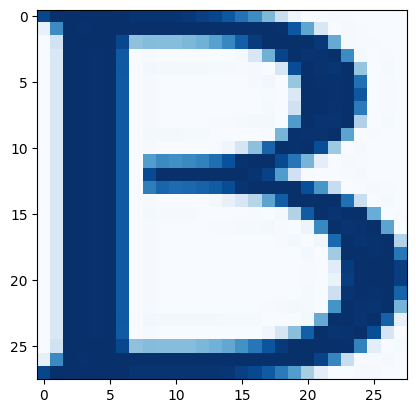

In [8]:
letter = letters[0].reshape(28,28)

plt.imshow(letter.cpu(), cmap="Blues")

In [11]:
digits = load_mnist784(target_digit, T, device=DEVICE)

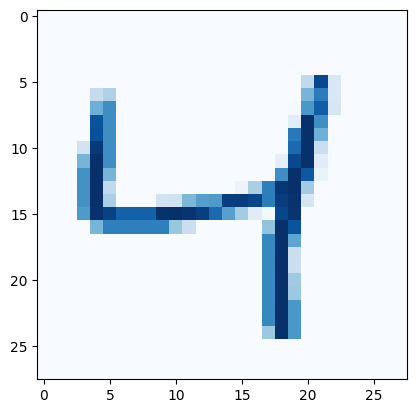

In [12]:
digit = digits[0].reshape(28,28)

plt.imshow(digit.cpu(), cmap="Blues")

In [7]:
C = get_2d_tm(d, device=DEVICE)

In [8]:
def get_method_oracles(q: torch.Tensor, C: torch.Tensor, n: int) -> tuple[OperatorOracle, OperatorOracle, torch.Tensor]:
    bar_true = ot.barycenter(q.T, C, 0.01)
    F, F1 = OperatorOracle(C, q, n, True, device=DEVICE), OperatorOracle(C, q, n, False, device=DEVICE)
    
    return F, F1, bar_true

In [53]:
with open(f"reports/oracles/F_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F, f)
with open(f"reports/oracles/F1_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(F1, f)
with open(f"reports/oracles/bar_true_d={d}_T={T}_n={n}.pkl", "wb") as f:
    pickle.dump(bar_true, f)

In [9]:
F, F1, bar_true = get_method_oracles(letters, C, n)

/home/MuXauJl11110/PAUS/env/lib/python3.11/site-packages/ot/bregman/_utils.py:20: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  return nx.exp(nx.dot(nx.log(alldistribT), weights.T))


In [11]:
method = PAUS(F, F1, 2, 30, True, bar_true=bar_true, device=DEVICE)
delta = 2 * (T - n) / T
p_star, history = method.fit(delta, delta * step_scale, max_iter)

Iter: 0, Dual gap: -0.0036631030961871147
Iter: 10, Dual gap: -0.0036631030961871147
Iter: 20, Dual gap: -0.0036631030961871147
Iter: 30, Dual gap: -0.0036631030961871147
Iter: 40, Dual gap: -0.003663103561848402
Iter: 50, Dual gap: -0.0036631030961871147
Iter: 60, Dual gap: -0.0036631033290177584
Iter: 70, Dual gap: -0.003663103561848402
Iter: 80, Dual gap: -0.0036631037946790457
Iter: 90, Dual gap: -0.0036631037946790457
Iter: 100, Dual gap: -0.0036631040275096893
Iter: 110, Dual gap: -0.0036631040275096893
Iter: 120, Dual gap: -0.003663104260340333
Iter: 130, Dual gap: -0.0036631044931709766
Iter: 140, Dual gap: -0.0036631047260016203
Iter: 150, Dual gap: -0.0036631051916629076
Iter: 160, Dual gap: -0.0036631054244935513
Iter: 170, Dual gap: -0.0036631054244935513
Iter: 180, Dual gap: -0.0036631058901548386
Iter: 190, Dual gap: -0.003663106122985482
Iter: 200, Dual gap: -0.003663106355816126
Iter: 210, Dual gap: -0.003663106355816126
Iter: 220, Dual gap: -0.003663106821477413
Iter: 

In [12]:
with open(f"reports/notMNIST_small/methods/paus_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(history, f)
with open(f"reports/notMNIST_small/methods/paus_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(p_star, f)

In [17]:
mirror_prox = MirrorProx(F, True, bar_true=bar_true, device=DEVICE)

In [18]:
mp_p_star, mp_history = mirror_prox.fit(L, 1 / L * step_scale, max_iter)

Iter: 0, Dual gap: -0.0036631030961871147
Iter: 10, Dual gap: -0.0036631030961871147
Iter: 20, Dual gap: -0.0036631030961871147
Iter: 30, Dual gap: -0.0036631030961871147
Iter: 40, Dual gap: -0.0036631033290177584
Iter: 50, Dual gap: -0.0036631030961871147
Iter: 60, Dual gap: -0.0036631030961871147
Iter: 70, Dual gap: -0.0036631033290177584
Iter: 80, Dual gap: -0.003663103561848402
Iter: 90, Dual gap: -0.003663103561848402
Iter: 100, Dual gap: -0.003663103561848402
Iter: 110, Dual gap: -0.003663103561848402
Iter: 120, Dual gap: -0.003663103561848402
Iter: 130, Dual gap: -0.0036631037946790457
Iter: 140, Dual gap: -0.0036631037946790457
Iter: 150, Dual gap: -0.0036631040275096893
Iter: 160, Dual gap: -0.0036631040275096893
Iter: 170, Dual gap: -0.0036631040275096893
Iter: 180, Dual gap: -0.003663103561848402
Iter: 190, Dual gap: -0.003663103561848402
Iter: 200, Dual gap: -0.0036631030961871147
Iter: 210, Dual gap: -0.0036631026305258274
Iter: 220, Dual gap: -0.003663101466372609
Iter: 2

In [57]:
with open(f"reports/notMNIST_small/dist_true/d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(method.dist_true.item(), f)

In [44]:
with open(f"reports/notMNIST_small/methods/mirror-prox_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_history, f)
with open(f"reports/notMNIST_small/methods/mirror-prox_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "wb") as f:
    pickle.dump(mp_p_star, f)

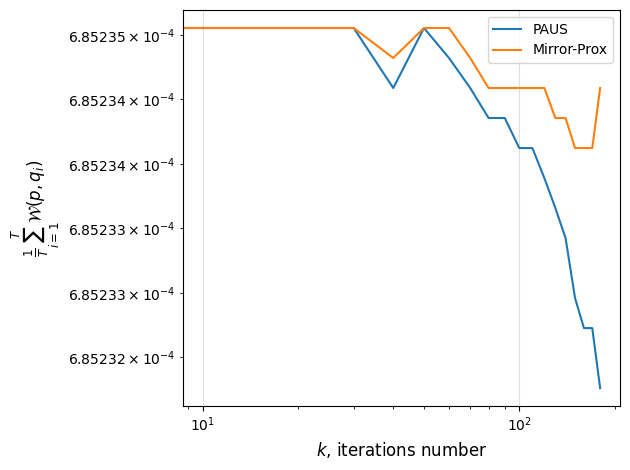

In [61]:
for method_name, label in zip(["paus", "mirror-prox"], ["PAUS", "Mirror-Prox"]):
    with open(f"reports/notMNIST_small/methods/{method_name}_history_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        history = pickle.load(f)
    with open(f"reports/notMNIST_small/dist_true/d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        dist_true = pickle.load(f)
    num_point = 19
    plt.loglog(history["iter"][:num_point], np.array(history["dual_gap"][:num_point]) + dist_true, label=label)
plt.ylabel(r'$\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p,q_i)$', fontsize=12)
#plt.ylabel(r'$\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p,q_i) -\frac{1}{T}\sum_{i=1}^T\mathcal{W}(p^*,q_i)$', fontsize=12)
plt.xlabel('$k$, iterations number', fontsize=12)

plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()

# Gaussian

In [112]:
def get_method_gaussians(d: int, T: int, n: int) -> tuple[OperatorOracle, OperatorOracle, torch.Tensor]:
    C = get_1d_tm(d, device=DEVICE)
    histograms, bar_true = get_gaussian(d, T, device=DEVICE)
    F, F1 = OperatorOracle(C, histograms, n, True), OperatorOracle(C, histograms, n, False)
    
    return F, F1, bar_true

In [165]:
F, F1, bar_true = get_method_gaussians(d, T, n)

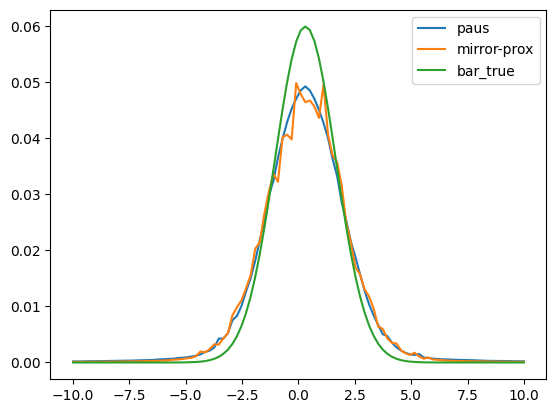

In [89]:
x = np.linspace(-10, 10, 100)
# for gamma_scale in [0.1, 0.01]:#, 10.0]:
#     with open(f"paus_gaussian_z_{gamma_scale}.pkl", "rb") as f:
#         z = pickle.load(f)
#         print(gamma_scale, z.p.sum())
#     plt.plot(x, z.p, label=f'{gamma_scale:.2f}')

# with open(f"paus_gaussian_z.pkl", "rb") as f:
#     z = pickle.load(f)
#     print(1, z.p.sum())
for method_name in ["paus", "mirror-prox"]:
    with open(f"reports/methods/{method_name}_p_star_d={d}_T={T}_n={n}_step_scale={step_scale}_max_iter={max_iter}.pkl", "rb") as f:
        p_star = pickle.load(f)
    plt.plot(x, p_star, label=method_name)

# with open(f"paus_gaussian_bartrue.pkl", "rb") as f:
#     p = pickle.load(f)
plt.plot(x, bar_true, label='bar_true')
plt.legend()